In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# adding header 
headerList = ['age', 'workclass', 'fnlwgt', 'education', 'education-num' , 'marital-status','occupation', 'relationship' , 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','label' ] 

data=pd.read_csv('adult.data',names=headerList,sep=',',skipinitialspace=True)
print(data)

       age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-manag

In [2]:
# Display the summary of its features
# Result reveal that features contain object and int64 data type 
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  label           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


##Assess content of dataset to check for NaN or unknown value
====================

In [3]:
# use pandas.unique to assess unique value in each column as well as NaN value before we proceed on with data preprocessing
#We noticed there no NaN value however '?' is present in 'workclass', 'occupation', 'native-country' column

headerList = ['age', 'workclass', 'fnlwgt', 'education', 'education-num' , 'marital-status','occupation', 'relationship' , 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','label' ] 

for i in range(0, len(headerList)): 
    print( headerList[i], data[headerList[i]].unique() )

age [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
fnlwgt [ 77516  83311 215646 ...  34066  84661 257302]
education ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
education-num [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-

In [4]:
#Count number of records with '<=50K' and '>50K'
labelCount = data[['label']].value_counts()
print (labelCount)

label
<=50K    24720
>50K      7841
Name: count, dtype: int64


##Visualize Continuous data to assess necessaty for outlier management 
=======================================================================

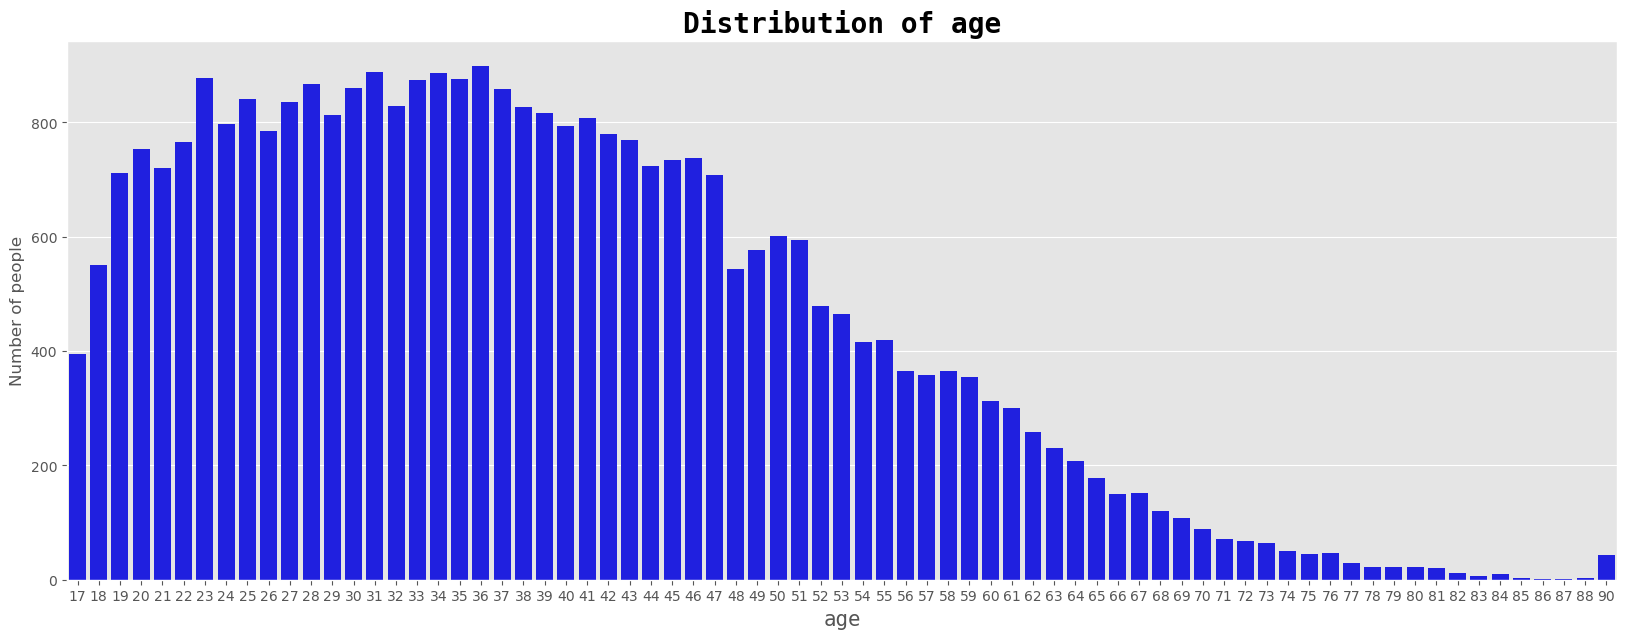

In [5]:
# Using bar chart to assess distribution of age

ageVal = data['age'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(20, 7))
sns.barplot(x=ageVal.index, y=ageVal.values, color='blue')
plt.title('Distribution of age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('age', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people')
plt.tick_params(labelsize=10)
plt.show()

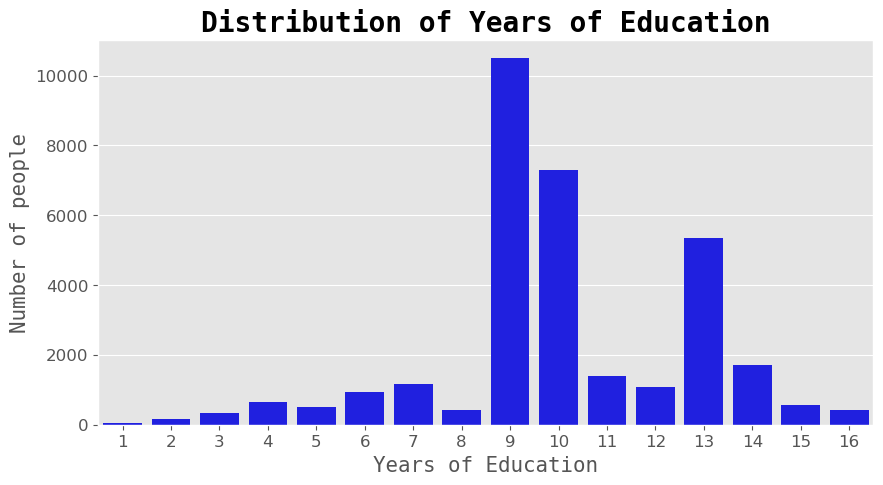

In [6]:
# Using bar chart to assess distribution of education-num

edu_num = data['education-num'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(x=edu_num.index, y=edu_num.values, color='blue')
plt.title('Distribution of Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

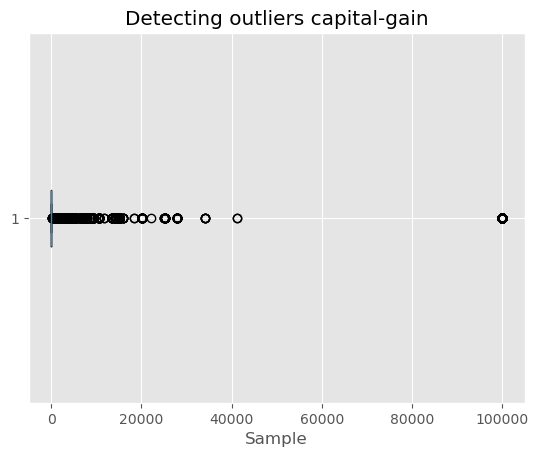

In [7]:
# Using box chart to assess outlier of capital-gain

sample= data[['capital-gain']]
plt.boxplot(sample, vert=False)
plt.title("Detecting outliers capital-gain")
plt.xlabel('Sample')
plt.show()

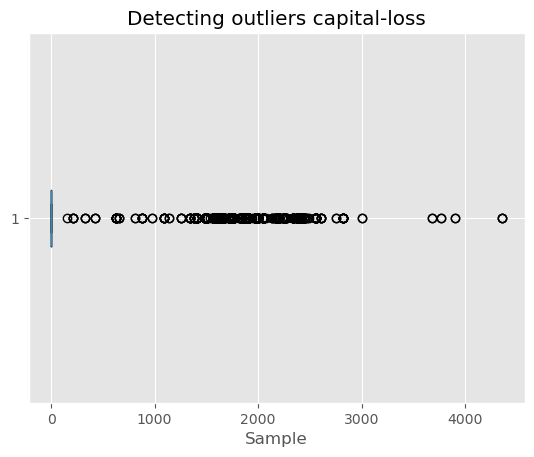

In [8]:
# Using box chart to assess outlier of capital-loss

sample= data[['capital-loss']]
plt.boxplot(sample, vert=False)
plt.title("Detecting outliers capital-loss")
plt.xlabel('Sample')
plt.show()

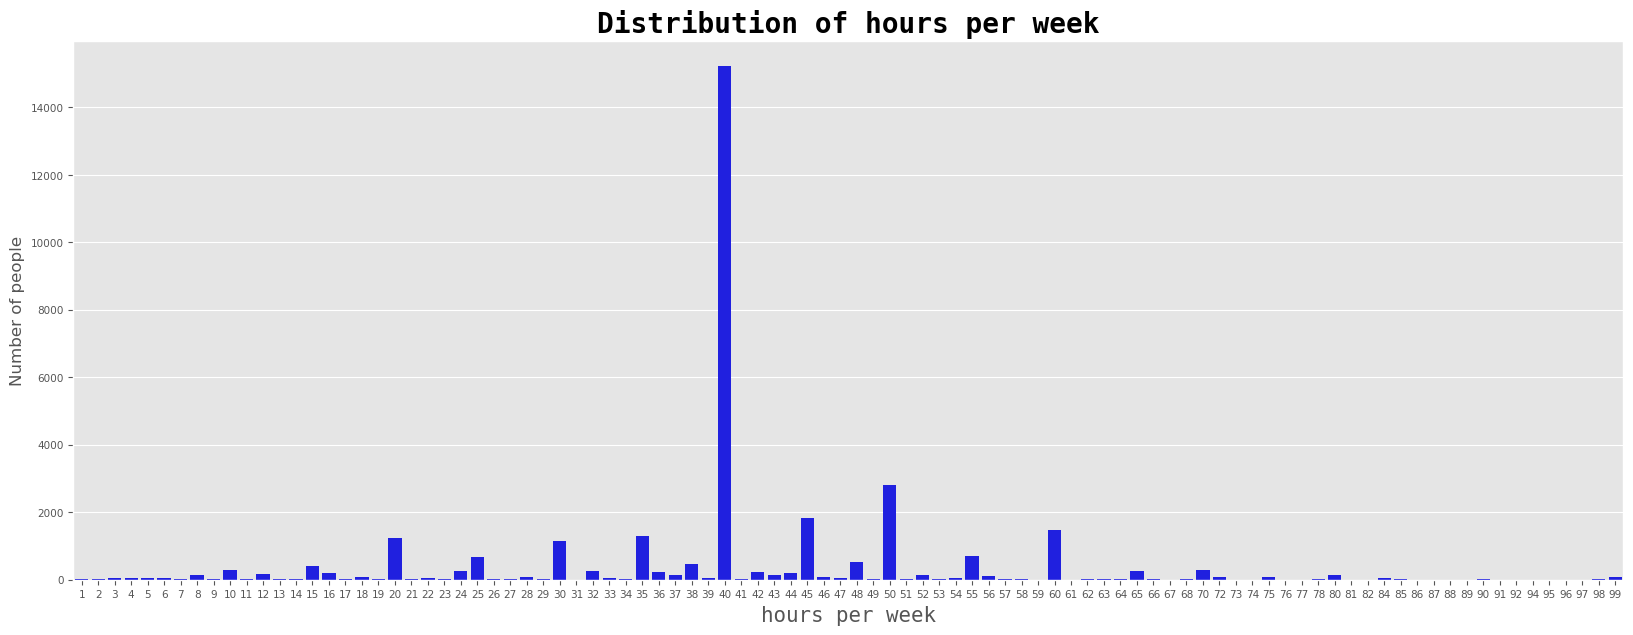

In [9]:
# Using bar chart to assess distribution of hours-per-week

edu_num = data['hours-per-week'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(20, 7))
sns.barplot(x=edu_num.index, y=edu_num.values, color='blue')
plt.title('Distribution of hours per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('hours per week', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people')
plt.tick_params(labelsize=7.5)
plt.show()

In [10]:
df1 = data.groupby(by=["education-num", "education"]).size().reset_index(name="Time")
print(df1)

    education-num     education   Time
0               1     Preschool     51
1               2       1st-4th    168
2               3       5th-6th    333
3               4       7th-8th    646
4               5           9th    514
5               6          10th    933
6               7          11th   1175
7               8          12th    433
8               9       HS-grad  10501
9              10  Some-college   7291
10             11     Assoc-voc   1382
11             12    Assoc-acdm   1067
12             13     Bachelors   5355
13             14       Masters   1723
14             15   Prof-school    576
15             16     Doctorate    413


In [11]:
df3 = data.groupby(by=['native-country' ]).size().reset_index(name="Time")
print(df3)



                native-country   Time
0                            ?    583
1                     Cambodia     19
2                       Canada    121
3                        China     75
4                     Columbia     59
5                         Cuba     95
6           Dominican-Republic     70
7                      Ecuador     28
8                  El-Salvador    106
9                      England     90
10                      France     29
11                     Germany    137
12                      Greece     29
13                   Guatemala     64
14                       Haiti     44
15          Holand-Netherlands      1
16                    Honduras     13
17                        Hong     20
18                     Hungary     13
19                       India    100
20                        Iran     43
21                     Ireland     24
22                       Italy     73
23                     Jamaica     81
24                       Japan     62
25          